<h2>Notebook to preprocess LIAR2 dataset</h2>

In [2]:
%pip install datasets
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<h2>LIAR2 DATASET</h2>

Descripción del dataset

- ID: identificador único.

- Label: calificación de veracidad asignada por PolitiFact (seis niveles: Pants-on-Fire, False, Barely-True, Half-True, Mostly-True, True).

- Statement: texto completo de la afirmación.

- Subject: tema o categoría de la afirmación (p. ej., economía, salud, política).

- Speaker: persona que emite la afirmación.

- Speaker_job: cargo o puesto de trabajo del orador.

- State_info: estado de EE. UU. asociado al orador o al contexto de la afirmación.

- Party_affiliation: afiliación política del orador (Demócrata, Republicano, Independiente, etc.).

- Barely_true_count, false_count, half_true_count, mostly_true_count, pants_on_fire_count: número de afirmaciones previas del mismo orador clasificadas en cada nivel de veracidad (hasta el momento de la nueva declaración).

- Context: información adicional sobre el entorno de la afirmación (lugar, evento, medio de comunicación, etc.)

- Date: fecha en la que se hizo la afirmación (formato YYYY-MM-DD).

- Justification: texto de la explicación o argumentación que el equipo de fact-checking aporta para motivar la calificación dada a la afirmación.

- Credibility_history: historial agregado de credibilidad del orador, que resume de forma conjunta sus antiguos recuentos de veracidad como un indicador de reputación previa.

Carga del dataset LIAR2

In [3]:
from datasets import load_dataset

liar_dataset = load_dataset("chengxuphd/liar2")

e:\Master\TFM\FakeNewsReactApp\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Primer vistazo al conjunto de datos

In [4]:
print(liar_dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'statement', 'date', 'subject', 'speaker', 'speaker_description', 'state_info', 'true_counts', 'mostly_true_counts', 'half_true_counts', 'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'context', 'justification'],
        num_rows: 18369
    })
    validation: Dataset({
        features: ['id', 'label', 'statement', 'date', 'subject', 'speaker', 'speaker_description', 'state_info', 'true_counts', 'mostly_true_counts', 'half_true_counts', 'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'context', 'justification'],
        num_rows: 2297
    })
    test: Dataset({
        features: ['id', 'label', 'statement', 'date', 'subject', 'speaker', 'speaker_description', 'state_info', 'true_counts', 'mostly_true_counts', 'half_true_counts', 'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'context', 'justification'],
        num_rows: 2296
    })
})


In [5]:
import pandas as pd

df = pd.concat([
    pd.DataFrame(liar_dataset["train"]),
    pd.DataFrame(liar_dataset["validation"]),
    pd.DataFrame(liar_dataset["test"])
], ignore_index=True)

print(f"Dataset LIAR2 cargado: {df.shape[0]} filas y {df.shape[1]} columnas")

df.head()

Dataset LIAR2 cargado: 22962 filas y 16 columnas


,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22962 entries, 0 to 22961
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    22962 non-null  int64 
 1   label                 22962 non-null  int64 
 2   statement             22962 non-null  object
 3   date                  22962 non-null  object
 4   subject               22755 non-null  object
 5   speaker               22962 non-null  object
 6   speaker_description   22952 non-null  object
 7   state_info            17321 non-null  object
 8   true_counts           22962 non-null  int64 
 9   mostly_true_counts    22962 non-null  int64 
 10  half_true_counts      22962 non-null  int64 
 11  mostly_false_counts   22962 non-null  int64 
 12  false_counts          22962 non-null  int64 
 13  pants_on_fire_counts  22962 non-null  int64 
 14  context               22808 non-null  object
 15  justification         22962 non-null

In [7]:
print("Nulos por columna:\n", df.isnull().sum())

Nulos por columna:
 id                         0
label                      0
statement                  0
date                       0
subject                  207
speaker                    0
speaker_description       10
state_info              5641
true_counts                0
mostly_true_counts         0
half_true_counts           0
mostly_false_counts        0
false_counts               0
pants_on_fire_counts       0
context                  154
justification              0
dtype: int64


<h3>Columna STATE_INFO</h3>

La variable state_info representa el estado de EE. UU. asociado al periodista o al contexto de la afirmación.

No es extrapolable a otros países de habla inglesa por lo que es una característica que no aporta mucho valor analítico.

Por otro lado tiene un 30 % de nulos por lo que los datos recogidos se podrían considerar muy inferiores respecto al resto de valores

Por todo esto se ha decidido eliminar la variable state_info del conjunto de datos

In [8]:
df = df.drop(columns=["state_info"])

df.head()

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


<h3>Columna SUBJECT</h3>

Visualizamos los valores nulos de la columna 'subject'

Los temas que se tratan en la noticia son cruciales para entender el contexto del texto, por lo que eliminarlos por completo podría ser problemático.

In [9]:
df.loc[df['subject'].isna()]

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
99,5,4,"New Mexico moved ""up to"" sixth in the nation i...","May 10, 2007",None,bill richardson,Bill Richardson is the former governor of New ...,2,8,3,1,2,1,a TV Ad,"Richardson is correct, but doesn't mention the..."
513,19760,0,"The Biden White House has ""no one there. They ...","May 18, 2021",None,eric trump,Eric Trump is the second son of President Dona...,0,0,0,1,1,3,a Fox News appearance,"Eric Trump said of the Biden White House, ""The..."
692,17915,1,"Antifa ""are killing our police. Looting our bu...","June 22, 2020",None,dane eagle,Dane Eagle was elected to the Florida House of...,0,0,0,0,1,0,a social media ad,"Eagle said in a social media ad that antifa ""a..."
813,2116,3,"Seventy bills [Kendrick Meek] authored, not on...","August 10, 2010",None,jeff greene,"Jeff Greene, a wealthy businessman from Palm B...",0,1,3,4,1,0,a debate,While Meek may have not passed significant leg...
937,18066,1,"Says Gov. Gretchen Whitmer ""defunded the Michi...","July 22, 2020",None,great lakes news,Great Lakes News is a radio program broadcast ...,0,0,0,0,1,0,a tweet,A tweet from Great Lakes News said a Whitmer e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22448,2663,5,We haven't had control of the House for the la...,"October 18, 2010",None,william g. batchelder,William G. Batchelder is speaker of the Ohio H...,2,1,1,0,1,3,an interview,He mentioned passage of a two-year state budge...
22455,2585,2,"Of the states that have a lieutenant governor,...","October 18, 2010",None,robert healey,Robert Healey is a lawyer and businessman who ...,1,0,0,1,0,0,The Providence Journal,"Louisiana State Rep. Cameron Henry, whose bill..."
22529,3942,3,Sherrod Brown was just voted two years in a ro...,"June 24, 2011",None,josh mandel,"Josh Mandel, a Republican from Lyndhurst, is a...",5,5,3,5,6,7,a radio interview,"And both were careful to say that Brown was ""r..."
22691,23185,2,"Photo shows President Joe Biden sitting with ""...","June 19, 2023",None,donald trump,Donald Trump is the former president of the Un...,36,85,120,194,360,179,a Truth Social post,"""I think that in a Biden administration you’ll..."


Para solucionar el problema de elementos nulos se va a asignar un tema genérico como "Unclassified".

In [10]:
df["subject"].fillna("Unclassified", inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2612\11594537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["subject"].fillna("Unclassified", inplace=True)


In [11]:
df.loc[df['subject'] == 'Unclassified']

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
99,5,4,"New Mexico moved ""up to"" sixth in the nation i...","May 10, 2007",Unclassified,bill richardson,Bill Richardson is the former governor of New ...,2,8,3,1,2,1,a TV Ad,"Richardson is correct, but doesn't mention the..."
513,19760,0,"The Biden White House has ""no one there. They ...","May 18, 2021",Unclassified,eric trump,Eric Trump is the second son of President Dona...,0,0,0,1,1,3,a Fox News appearance,"Eric Trump said of the Biden White House, ""The..."
692,17915,1,"Antifa ""are killing our police. Looting our bu...","June 22, 2020",Unclassified,dane eagle,Dane Eagle was elected to the Florida House of...,0,0,0,0,1,0,a social media ad,"Eagle said in a social media ad that antifa ""a..."
813,2116,3,"Seventy bills [Kendrick Meek] authored, not on...","August 10, 2010",Unclassified,jeff greene,"Jeff Greene, a wealthy businessman from Palm B...",0,1,3,4,1,0,a debate,While Meek may have not passed significant leg...
937,18066,1,"Says Gov. Gretchen Whitmer ""defunded the Michi...","July 22, 2020",Unclassified,great lakes news,Great Lakes News is a radio program broadcast ...,0,0,0,0,1,0,a tweet,A tweet from Great Lakes News said a Whitmer e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22448,2663,5,We haven't had control of the House for the la...,"October 18, 2010",Unclassified,william g. batchelder,William G. Batchelder is speaker of the Ohio H...,2,1,1,0,1,3,an interview,He mentioned passage of a two-year state budge...
22455,2585,2,"Of the states that have a lieutenant governor,...","October 18, 2010",Unclassified,robert healey,Robert Healey is a lawyer and businessman who ...,1,0,0,1,0,0,The Providence Journal,"Louisiana State Rep. Cameron Henry, whose bill..."
22529,3942,3,Sherrod Brown was just voted two years in a ro...,"June 24, 2011",Unclassified,josh mandel,"Josh Mandel, a Republican from Lyndhurst, is a...",5,5,3,5,6,7,a radio interview,"And both were careful to say that Brown was ""r..."
22691,23185,2,"Photo shows President Joe Biden sitting with ""...","June 19, 2023",Unclassified,donald trump,Donald Trump is the former president of the Un...,36,85,120,194,360,179,a Truth Social post,"""I think that in a Biden administration you’ll..."


<h3>Columna SPEAKER_DESCRIPTION</h3>

Visualizamos los valores nulos de la columna 'speaker_description'

In [12]:
df.loc[df['speaker_description'].isna()]

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
2384,2139,0,President Obama is a Muslim.,"August 19, 2010",candidate biography;obama birth certificate;re...,18% of the american public,None,0,0,0,0,0,1,a Pew Research Center poll,A benign explanation is that there is genuine ...
2992,2239,3,"Clayton County has employed 1,300 people over ...","September 7, 2010",economy;housing,mickie williams,None,0,0,1,0,0,0,a presentation,"But, as Emrath and others said, it would be ea..."
3262,8964,2,"Even when all other state agencies took cuts, ...","June 4, 2014",education,republican party of georgia,None,0,0,1,2,1,0,press release,But it’s also important to know that while aus...
4525,2586,1,"State House incumbent Jill Chambers, R-Atlanta...","October 13, 2010",ethics,georgia house democratic caucus on behalf of e...,None,0,0,0,0,1,0,a campaign mailer,Parent's backers suggest Chambers is wasteful ...
6144,7927,2,When SACS came back to the DeKalb County Schoo...,"October 3, 2013",education,michael thurmond,None,1,0,0,1,0,0,a community meeting,But it also notes the significant work that is...
12476,7913,1,Rather than prioritize and pass ethics reform ...,"September 19, 2013",ethics,republican party of georgia,None,0,0,1,2,1,0,a press release,"Mahoney stood by the . ""When you do the math a..."
14214,2572,0,"Vows to keep Georgia's race for governor ""civi...","October 28, 2010",message machine 2010,roy barnes and nathan deal,None,0,0,0,0,0,1,statements to the press,"But it also leads to an uninformed electorate,..."
15260,2194,3,Georgia's U.S. senators voted for legislation ...,"August 17, 2010",environment;energy,stephen kretzmann,None,0,0,1,0,0,0,a website,Murkowski argued her resolution would not impa...
19616,2158,5,"Michael Thurmond ""authored major legislation t...","April 30, 2010",taxes,michael thurmond,None,1,0,0,1,0,0,his campaign website,The data comes from the department's annual st...
21640,2272,2,Barnes opposed the creation of the HOPE Schola...,"September 7, 2010",education,republican party of georgia,None,0,0,1,2,1,0,GOP press release,The lottery eventually became the funding mech...


Debido a que se tratan de 10 valores nulos y en algunos casos el speaker es el mismo, se van a buscar datos relacionados para completar esta información del dataset

In [13]:
descripciones = {
    "republican party of georgia": "The Republican Party of Georgia is a political party in Georgia active since 1978.",
    "18% of the american public": "People who have been surveyed",
    "mickie williams": "Affordable Housing Consultant and Developer at Georgia Housing Consultants",
    "michael thurmond": "Michael Thurmond is an American author, attorney, and Democrat politician.",
    "stephen kretzmann": "Stephen kretzmann is Executive Director/Founder at Oil Change International",
    "roy barnes and nathan deal": "Roy Barnes is the former governor of Georgia and Nathan Deal is running for Georgia governor in 2010.",
    "georgia house democratic caucus on behalf of elena parent": "Georgia Democratic Caucus on behalf of Senator Elena Parent"
}

# Asignar las descripciones usando .loc[]
for speaker, description in descripciones.items():
    df.loc[df['speaker'] == speaker, 'speaker_description'] = description

Comprobamos que ya no haya datos nulos y vamos a observar los datos cambiados en nuestro dataset

In [14]:
df.loc[df['speaker_description'].isna()]

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification


In [15]:
speakers_modificados = [descripciones.keys()]

df.loc[df["speaker"].isin(speakers_modificados[0])]

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
2384,2139,0,President Obama is a Muslim.,"August 19, 2010",candidate biography;obama birth certificate;re...,18% of the american public,People who have been surveyed,0,0,0,0,0,1,a Pew Research Center poll,A benign explanation is that there is genuine ...
2992,2239,3,"Clayton County has employed 1,300 people over ...","September 7, 2010",economy;housing,mickie williams,Affordable Housing Consultant and Developer at...,0,0,1,0,0,0,a presentation,"But, as Emrath and others said, it would be ea..."
3262,8964,2,"Even when all other state agencies took cuts, ...","June 4, 2014",education,republican party of georgia,The Republican Party of Georgia is a political...,0,0,1,2,1,0,press release,But it’s also important to know that while aus...
4525,2586,1,"State House incumbent Jill Chambers, R-Atlanta...","October 13, 2010",ethics,georgia house democratic caucus on behalf of e...,Georgia Democratic Caucus on behalf of Senator...,0,0,0,0,1,0,a campaign mailer,Parent's backers suggest Chambers is wasteful ...
6144,7927,2,When SACS came back to the DeKalb County Schoo...,"October 3, 2013",education,michael thurmond,"Michael Thurmond is an American author, attorn...",1,0,0,1,0,0,a community meeting,But it also notes the significant work that is...
12476,7913,1,Rather than prioritize and pass ethics reform ...,"September 19, 2013",ethics,republican party of georgia,The Republican Party of Georgia is a political...,0,0,1,2,1,0,a press release,"Mahoney stood by the . ""When you do the math a..."
14214,2572,0,"Vows to keep Georgia's race for governor ""civi...","October 28, 2010",message machine 2010,roy barnes and nathan deal,Roy Barnes is the former governor of Georgia a...,0,0,0,0,0,1,statements to the press,"But it also leads to an uninformed electorate,..."
15260,2194,3,Georgia's U.S. senators voted for legislation ...,"August 17, 2010",environment;energy,stephen kretzmann,Stephen kretzmann is Executive Director/Founde...,0,0,1,0,0,0,a website,Murkowski argued her resolution would not impa...
19616,2158,5,"Michael Thurmond ""authored major legislation t...","April 30, 2010",taxes,michael thurmond,"Michael Thurmond is an American author, attorn...",1,0,0,1,0,0,his campaign website,The data comes from the department's annual st...
21640,2272,2,Barnes opposed the creation of the HOPE Schola...,"September 7, 2010",education,republican party of georgia,The Republican Party of Georgia is a political...,0,0,1,2,1,0,GOP press release,The lottery eventually became the funding mech...


Visualizamos los valores nulos de la columna 'context'

In [21]:
df.loc[df['context'].isna() | df["context"].str.strip().eq("")]

,id,label,statement,date,subject,speaker,speaker_description,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
137,112,3,"First, he said he would take all of our troops...","October 12, 2007",iraq,joe biden,Joe Biden is the president of the United State...,25,64,65,52,55,7,None,"In a Richardson campaign video, a narrator say..."
204,255,0,"The Mormon religion has ""a plan that will see ...","December 22, 2007",religion,freedom defense advocates,Freedom Defense Advocates is a political actio...,0,0,0,0,0,1,None,There is absolutely no place for these attacks...
334,15263,0,Man dug tunnel from home to the pub and drank ...,"October 7, 2017",fake news;facebook fact-checks,bloggers,Blog posting on the Internet,8,18,24,53,233,396,None,"""We messed up,"" the addendum says. ""The story ..."
539,14432,4,Homelessness has skyrocketed across California...,"March 8, 2018",homeless;housing;states;the 2018 california go...,travis allen,Travis Allen is a Republican and a member of t...,0,2,0,3,2,1,None,Candidate for governor and state lawmaker Trav...
614,14379,1,Singer Miley Cyrus: 'Trump fans are destroying...,"March 8, 2018",fake news;punditfact,bloggers,Blog posting on the Internet,8,18,24,53,233,396,None,A news story said that Miley Cyrus is blaming...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22416,73,5,Obama Skips Out On Condemning Left-Wing Attack...,"September 21, 2007",iraq,republican national committee,The Republican National Committee is the natio...,4,5,12,9,8,2,None,The resolution was offered by Sen. John Cornyn...
22576,9890,4,Assault weapons and handguns are allowed in th...,"January 19, 2015",guns,virginia house democratic caucus,The House Democratic Caucus consists of the 32...,0,1,0,0,1,0,None,"Calling for reform to Virginia’s gun laws, Hou..."
22777,15374,2,"Liberal Democrats"" who back Dan McCready ""cut ...","November 22, 2018",health care,mark harris,Rev. Mark Harris is the former pastor of First...,0,0,1,1,3,0,None,"However, his use of the number also gives a i..."
22866,13218,1,"Says North Carolina's replacement for HB2 ""ord...","March 31, 2017",civil rights;government regulation;lgbtq;sexua...,caitlyn jenner,"Caitlyn Jenner is a reality TV star, former Ol...",0,0,0,0,1,0,None,"After North Carolina replaced HB2, pro-LGBT ac..."


Para rellenar el conjunto de datos creamos una serie de reglas basadas en la justificación de la noticia que nos permitirá inferir el contexto de la noticia.

In [ ]:
import re

CONTEXT_PATTERNS = {
    "social media": [
        r"\btweet\b", r"\btwitter\b", r"\bfacebook\b", r"\bpost\b",
        r"\bsocial media\b", r"\binstagram\b", r"\blinkedin\b"
    ],
    "speech": [
        r"\bspeech\b", r"\baddress\b", r"\bremarks\b", r"\bstatement\b"
    ],
    "press release": [
        r"\bpress release\b", r"\bpress conference\b", r"\brelease\b"
    ],
    "interview": [r"\binterview\b", r"\binterviewed\b"],
    "news article": [r"\barticle\b", r"\breport\b", r"\bnews\b"],
    "campaign": [r"\bcampaign video\b", r"\bcampaign\b"],
    "tv": [r"\btv\b", r"\btelevision\b", r"\btv show\b"],
    "research article": [r"\bstudy\b", r"\bstudy published\b", r"\bresearch\b"]
}

COMPILED_PATTERNS = [
    (re.compile("|".join(patterns), re.IGNORECASE), label)
    for label, patterns in CONTEXT_PATTERNS.items()
]

def infer_context(text):
    if not isinstance(text, str) or not text.strip():
        return "unknown"
    for regex, label in COMPILED_PATTERNS:
        if regex.search(text):
            return label
    return "unknown"

In [82]:
mask = df["context"].isna() | df["context"].str.strip().eq("unknown")

df.loc[mask, "context"] = df.loc[mask, "justification"].apply(infer_context)

In [83]:
len(df.loc[df["context"].str.strip().eq("unknown")])

44

In [84]:
df.loc[df['context'] == 'unknown']['justification']

for statement in df.loc[df['context'] == 'unknown']['justification']:
    print(statement+"\n")

The chain email said Obama is the "first president to file lawsuits against the states he swore an oath to protect." But no president swears to protect the states -- they swear to protect the Constitution, which sometimes leads to clashes with states and the president is then obligated to challenge them through lawsuits. Our quick search produced dozens of examples of the federal government suing states going back a century. So we rate the  .

Kucinich advocates a prompt withdrawal of U.S. troops to be replaced with international peace keepers. Biden, on the other hand, has proposed an elaborate plan for partitioning Iraq into self-governing regions with U.S. troops helping maintain order. We won't take any points off for Richardson's  to be among the "major" candidates here, but we will lower his -O-Meter rating because the other candidates have not said they want troops in Iraq indefinitely, as Richardson suggests. Instead, they have said they need the information a commander-in-chie

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12044\2396658020.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_descriptions.values, y=top_descriptions.index, palette="viridis")


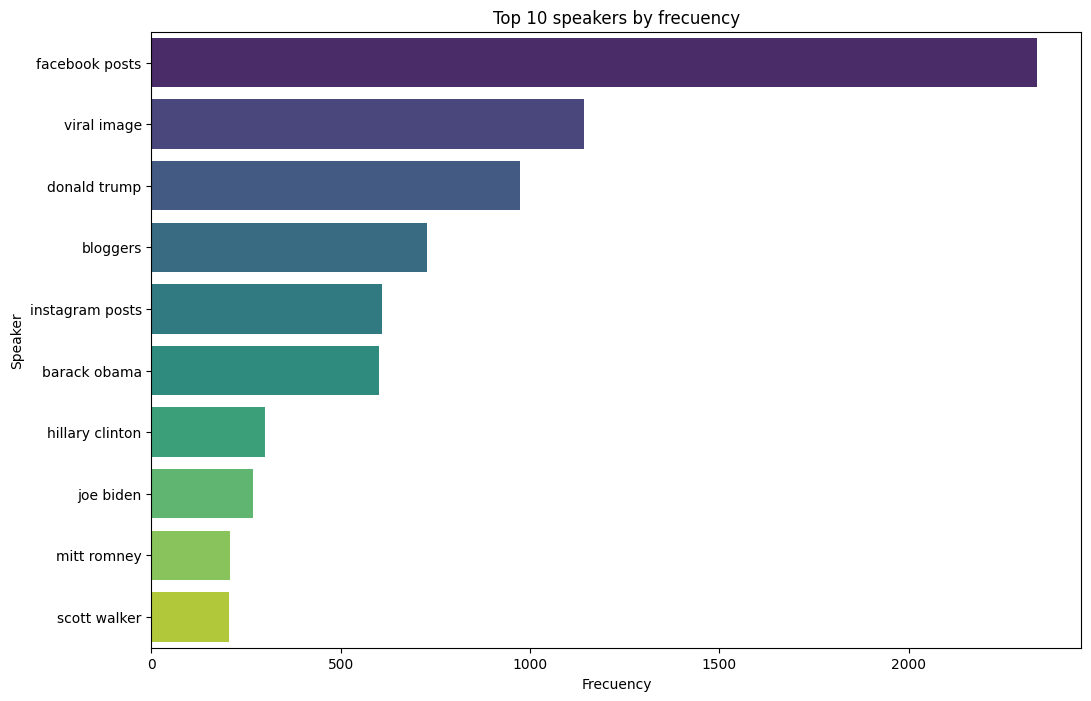

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n = 10
top_descriptions = df["speaker"].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_descriptions.values, y=top_descriptions.index, palette="viridis")
plt.title(f"Top {top_n} speakers by frecuency")
plt.xlabel("Frecuency")
plt.ylabel("Speaker")
plt.show()